In [1]:

%matplotlib inline
import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
%matplotlib widget
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets



In [2]:
def odeFunc(t,x):
    N = 1000
    S = x[0]
    I = x[1]
    R = x[2]
    beta = 0.2
    r = 0.6
    delta = 0.15
    # theta = np.array([beta, r, delta]) # true parameter settings
    y0 = delta*N - delta*S - beta*I*S  # del S
    y1 = beta*I*S - (r+delta)*I        # del I
    y2 = r*I - delta*R                 # del R
    return y0,y1,y2

In [3]:
def solverFunc():
    timeVec = np.linspace(0,6,61)
    S_0 = 900
    I_0 = 100
    R_0 = 0
    x_0 = np.array([S_0, I_0, R_0])
    soln = scipy.integrate.solve_ivp(odeFunc,[0,6],x_0,t_eval=timeVec,method='RK45')
    return soln

In [4]:
soln = solverFunc()
noisyIMeas = np.zeros(61)
stdNoise = 50 
for ii in range (len(noisyIMeas)):
    noisyIMeas[ii]=soln.y[1,ii]+stdNoise*np.random.randn()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
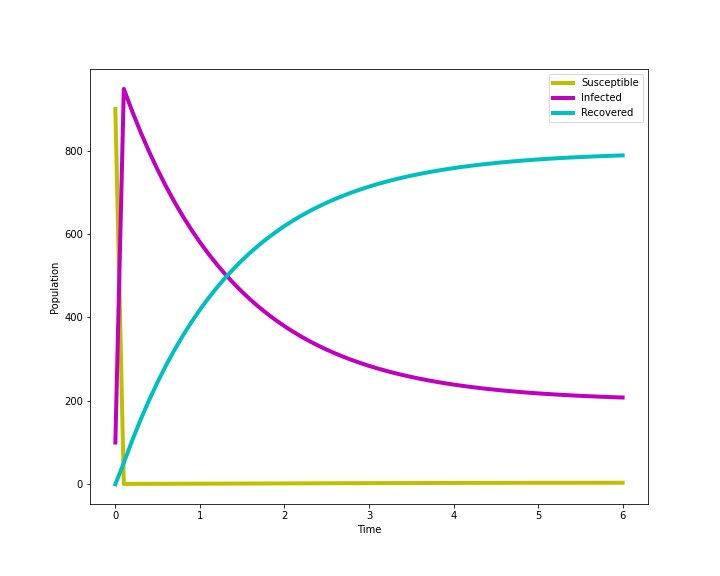

In [5]:
plt.figure(num='Identifiable Version',figsize=(10,8))
plt.plot(soln.t,soln.y[0,:],'y',linewidth=4,label='Susceptible')
plt.plot(soln.t,soln.y[1,:],'m',linewidth=4,label='Infected')
plt.plot(soln.t,soln.y[2,:],'c',linewidth=4,label='Recovered')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
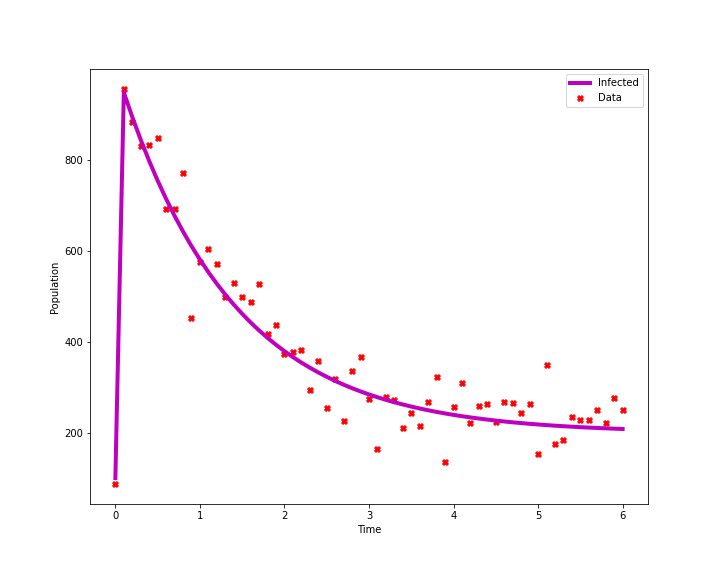

In [6]:
plt.figure(num='Data',figsize=(10,8))
plt.plot(soln.t,soln.y[1,:],'m',linewidth=4,label='Infected')
plt.scatter(soln.t,noisyIMeas, c='r', marker='X',s=33,label='Data')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.show()

In [ ]:
fig, sp = plt.subplots(4,1,figsize(8,7))
sp[0].plot(sol.t,sol.y[0,:],label='Susceptible')
sp[0].set_ylabel('Susceptible')
sp[0].set_xlabel('Time')
sp[1].plot(sol.t,sol.y[1,:],label='Infected')
sp[1].set_ylabel('Infected')
sp[1].set_xlabel('Time')
sp[2].plot(sol.t,sol.y[1,:],label='Recovered')
sp[2].set_ylabel('Recovered')
sp[2].set_xlabel('Time')
sp[3].plot(sol.t,sol.y[0,:],label='Susceptible')
sp[3].plot(sol.t,sol.y[1,:],label='Infected')
sp[3].plot(sol.t,sol.y[1,:],label='Recovered')
sp[3].legend()
sp[3].set_ylabel('Portions of the Population')
fig.suptitle('Identifiable Version',fontsize=12)
plt.show